In [1]:
from datasets.two4two import Two4TwoDataModule
from models.VQVAE import VQVAE
from models.training_utils import train_vqvae_datamodule
import torch

In [2]:
data_path = "/home/jonasklotz/Studys/23SOSE/XAI_in_SSL/data/two4two"
work_path = "/home/jonasklotz/Studys/23SOSE/XAI_in_SSL/results"

data_module = Two4TwoDataModule(data_dir=data_path, working_path=work_path)


In [3]:
#model, results = train_vqvae_datamodule(working_path=work_path, datamodule=data_module, max_epochs=1)


In [4]:
model = VQVAE.load_from_checkpoint("/home/jonasklotz/Studys/23SOSE/XAI_in_SSL/results/VAE.ckpt", map_location=torch.device('cpu'))


In [5]:
model

VQVAE(
  (_encoder): Encoder(
    (_conv_1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (_conv_2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (_conv_3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (_residual_stack): ResidualStack(
      (_layers): ModuleList(
        (0-1): 2 x Residual(
          (_block): Sequential(
            (0): ReLU(inplace=True)
            (1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (2): ReLU(inplace=True)
            (3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          )
        )
      )
    )
  )
  (_pre_vq_conv): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
  (_vq_vae): VectorQuantizerEMA(
    (_embedding): Embedding(128, 16)
  )
  (_decoder): Decoder(
    (_conv_1): Conv2d(16, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (_residual_stack): ResidualStack(
      (_layers): Module

tensor(0.0036, grad_fn=<MulBackward0>)


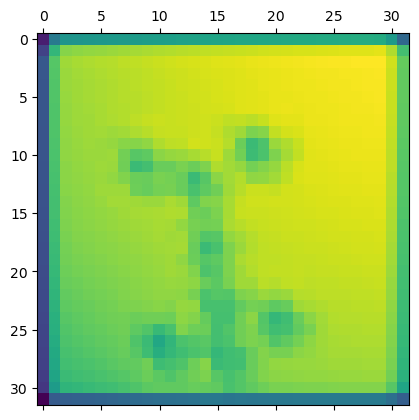

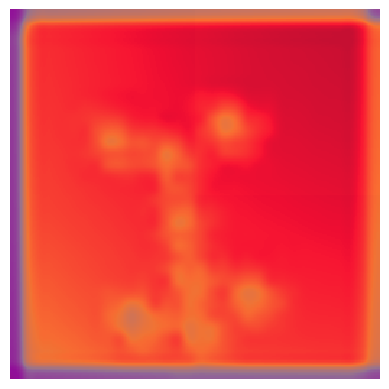

tensor(0.0036, grad_fn=<MulBackward0>)


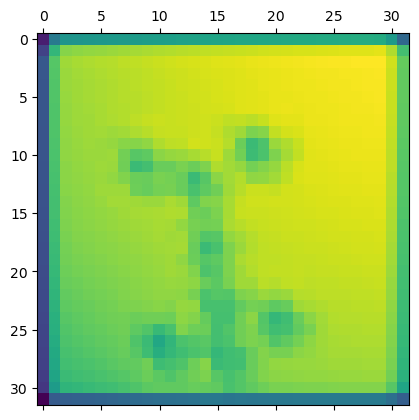

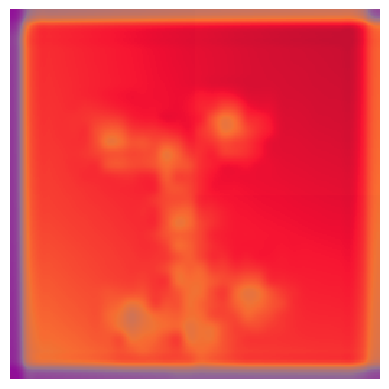

In [7]:
from xai.embedded_gradcam import GradCAM as GC

img_path = "/home/jonasklotz/Studys/23SOSE/XAI_in_SSL/data/test.png"
GC(model, img_path)
